In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_proc = pd.read_csv('data/procedures.csv')

In [3]:
df_phy = pd.read_csv('data/physicians.csv')

In [4]:
df_phy['Cardiologist'] = pd.get_dummies(df_phy.specialty)['Cardiology']
df_phy.columns = ['physician_id','specialty','Cardiologist']


In [5]:
merged = pd.merge(df_proc, df_phy, left_on='physician_id',right_on='physician_id',how='outer')

In [6]:
merged.head()

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,General Surgery,0
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,General Surgery,0
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,General Surgery,0
3,0,99212,established_patient_office_or_other_outpatient...,27,General Surgery,0
4,0,99213,established_patient_office_or_other_outpatient...,16,General Surgery,0


In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587774 entries, 0 to 587773
Data columns (total 6 columns):
physician_id          587774 non-null int64
procedure_code        587774 non-null object
procedure             587774 non-null object
number_of_patients    587774 non-null int64
specialty             587774 non-null object
Cardiologist          587774 non-null uint8
dtypes: int64(2), object(3), uint8(1)
memory usage: 27.5+ MB


In [9]:
procedure_words=[]
for line in merged.procedure:
    procedure_words.append(line.replace('_', ' '))

In [10]:
procedure_words[0]

'new patient office or other outpatient visit, typically 20 minutes'

In [11]:
sentences = []
for line in procedure_words:
    sentences.append(line.split())

In [12]:
len(sentences)

587774

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

C:\Users\Yash\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
model = Word2Vec(sentences=sentences)

X = model[model.wv.vocab]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(-1, 1)

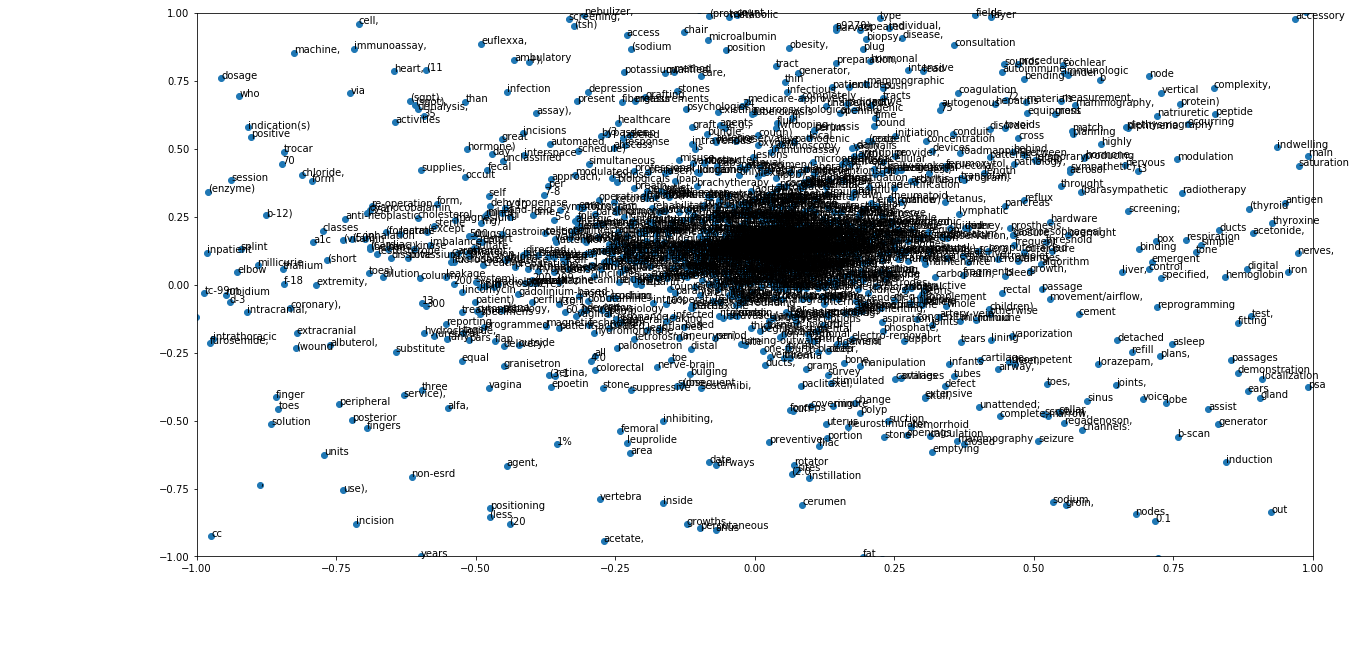

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)

for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.xlim(-1,1)
plt.ylim(-1,1)

In [28]:
model.wv.most_similar(positive=['rhythm'])

[('beat', 0.39181286096572876),
 ('patient-triggered', 0.3525998592376709),
 ('external', 0.35104554891586304),
 ('evaluations', 0.33636176586151123),
 ('48-hour', 0.3286314010620117),
 ('symptom-related', 0.3240632712841034),
 ('electrical', 0.31930387020111084),
 ('computer', 0.31609582901000977),
 ('events', 0.30908453464508057),
 ('rapid', 0.3026941418647766)]

In [29]:
model.wv.most_similar(positive=['heart'])

[('heart,', 0.3622332215309143),
 ('creatinine', 0.3414268493652344),
 ('gi', 0.3137342035770416),
 ('(sugar)', 0.31069016456604004),
 ('imbalance', 0.307417094707489),
 ('function', 0.30622243881225586),
 ('detection', 0.30019181966781616),
 ('breath', 0.29986971616744995),
 ('symptoms', 0.29801714420318604),
 ('red', 0.29736414551734924)]

In [30]:
model.wv.most_similar(positive=['blood'])

[('insertion', 0.31389158964157104),
 ('abdomen', 0.29612821340560913),
 ('using', 0.2675459384918213),
 ('supervision', 0.2535168528556824),
 ('tracing', 0.2521260678768158),
 ('interpretation', 0.24903830885887146),
 ('setting', 0.22813448309898376),
 ('uptake', 0.2215738445520401),
 ('above', 0.21949291229248047),
 ('monitoring', 0.2180248349905014)]

In [31]:
model.wv.most_similar(positive=['chambers'])

[('triglycerides)', 0.697162389755249),
 ('(cholesterol', 0.6366757154464722),
 ('evaluation,', 0.5513283014297485),
 ('valves,', 0.5362511873245239),
 ('lipids', 0.5330687165260315),
 ('3mg', 0.5200859308242798),
 ('betamethasone', 0.5157949924468994),
 ('drowsy', 0.510107159614563),
 ('right', 0.4862895607948303),
 ('design', 0.4844224452972412)]